# 2023-MLCL03-Mushroom (Random Forest) Project

## 0. Import Libraries

In [11]:
from IPython.display import Image

import time

import numpy as np
import pandas as pd
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

from collections import OrderedDict

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

## 1. Workflow Connections

###1.1 Kaggle API

In [ ]:
# Connect with Kaggle API
! mkdir -p ~/.kaggle/ && \
echo '-' > ~/.kaggle/kaggle.json && \
chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download Kaggle Dataset
!kaggle datasets download -d uciml/mushroom-classification

  0% 0.00/34.2k [00:00<?, ?B/s]
100% 34.2k/34.2k [00:00<00:00, 24.8MB/s]


In [ ]:
!unzip mushroom-classification.zip

Archive:  mushroom-classification.zip
  inflating: mushrooms.csv           


In [ ]:
%mv '/content/mushrooms.csv' '/content/drive/MyDrive/Colab Notebooks/My Publications/1. Machine Learning/1. Supervised Learning/2. Mushrooms'

mv: cannot stat '/content/mushrooms.csv': No such file or directory


### 1.2 Github

In [12]:
# Set up Git Config
!git config --global user.name '-'
!git config --global user.email '-'
!git config --global user.password '-'

In [13]:
token = '-'
username = '-'
repo = '-'

In [14]:
# Navigate to the folder where the current notebook is being saved
%cd '/content/drive/MyDrive/Colab Notebooks/My Publications/1. Machine Learning/1. Supervised Learning/2. Mushrooms/'

/content/drive/MyDrive/Colab Notebooks/My Publications/1. Machine Learning/1. Supervised Learning/2. Mushrooms


In [ ]:
!git clone https://{token}@github.com/{username}/{repo}

fatal: destination path 'publications_mushroom_classification' already exists and is not an empty directory.


In [15]:
%cd {repo}

/content/drive/MyDrive/Colab Notebooks/My Publications/1. Machine Learning/1. Supervised Learning/2. Mushrooms/publications_mushroom_classification


In [16]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   2. 2023-MLCL03-Mushroom (Random Forest).ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [17]:
!git add --all

In [18]:
!git commit -a -m "Updated Pytho Script - Completed Project"

[main 7dda046] Updated Pytho Script - Completed Project
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite 2. 2023-MLCL03-Mushroom (Random Forest).ipynb (94%)


In [19]:
!git push origin main

Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 1.12 KiB | 44.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/sidchakravarty/publications_mushroom_classification
   f67fa99..7dda046  main -> main


## 2. Load File and Explore Data

In [ ]:
mushroom_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/My Publications/1. Machine Learning/1. Supervised Learning/2. Mushrooms/publications_mushroom_classification/mushrooms.csv')
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 2.1 Recode Values

In [ ]:
dict_class = {'e':'edible', 'p': 'poisonous'}
dict_cap_shape = {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f':'flat',
                  'k': 'knobbed', 's':'sunken'}
dict_cap_surface = {'f':'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'}
dict_cap_color = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray',
                  'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red',
                  'w': 'white', 'y': 'yellow'}

dict_bruises = {'t': 1, 'f': 0}

dict_odor = {'a': 'almond', 'l': "anise", 'c': 'cresote', 'y': 'fishy',
             'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 
             's': 'spicy'}

dict_gill_attachment = {'a': 'attached', 'b': 'descending', 'f': 'free',
                        'n': 'notched'}
dict_gill_spacing = {'c': 'close', 'w': 'crowded', 'd': 'distant'}
dict_gill_size = {'b': 'broad', 'n': 'narrow'}
dict_gill_color = {'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray',
                  'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red',
                  'w': 'white', 'y': 'yellow', 'k': 'black', 'o': 'orange'}

dict_stalk_shape = {'e': 'enlarging', 't': 'tapering'}
dict_stalk_root = {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal',
                   'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'}
dict_stalk_surface_above_ring = {'f': 'fibrous', 'y': 'scaly', 'k': 'silky',
                                 's': 'smooth'}
dict_stalk_surface_below_ring = {'f': 'fibrous', 'y': 'scaly', 'k': 'silky',
                                 's': 'smooth'}
dict_stalk_color_above_ring = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon',
                               'g': 'gray', 'o': 'orange', 'p': 'pink',
                               'e': 'red', 'w': 'white', 'y': 'yellow'}
dict_stalk_color_below_ring = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon',
                               'g': 'gray', 'o': 'orange', 'p': 'pink',
                               'e': 'red', 'w': 'white', 'y': 'yellow'}

dict_veil_type = {'p': 'partial', 'u': 'universal'}
dict_veil_color = {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'}

dict_ring_number = {'n': 'none', 'o': 'one', 't': 'two'}
dict_ring_type = {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring',
                  'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing',
                  'z': 'zone'}
dict_spore_print_color = {'k': 'black', 'n': 'brown', 'b': 'buff', 
                          'c': 'chocolate', 'r': 'green', 'o': 'orange',
                          'u': 'purple', 'w': 'white', 'y': 'yellow'}
dict_population = {'a': 'abundant', 'c': 'clustered', 'n': 'numerous',
                   's': 'scattered', 'v': 'several', 'y': 'solitary'}
dict_habitat = {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 
                'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}

In [ ]:
mushroom_df.replace({'class': dict_class}, inplace = True)
mushroom_df.replace({'cap-shape': dict_cap_shape}, inplace = True)
mushroom_df.replace({'cap-surface': dict_cap_surface}, inplace = True)
mushroom_df.replace({'cap-color': dict_cap_color}, inplace = True)
mushroom_df.replace({'bruises': dict_bruises}, inplace = True)
mushroom_df.replace({'odor': dict_odor}, inplace = True)
mushroom_df.replace({'gill-attachment': dict_gill_attachment}, inplace = True)
mushroom_df.replace({'gill-spacing': dict_gill_spacing}, inplace = True)
mushroom_df.replace({'gill-size': dict_gill_size}, inplace = True)
mushroom_df.replace({'gill-color': dict_gill_color}, inplace = True)
mushroom_df.replace({'stalk-shape': dict_stalk_shape}, inplace = True)
mushroom_df.replace({'stalk-root': dict_stalk_root}, inplace = True)
mushroom_df.replace({'stalk-surface-above-ring': dict_stalk_surface_above_ring}, inplace = True)
mushroom_df.replace({'stalk-surface-below-ring': dict_stalk_surface_below_ring}, inplace = True)
mushroom_df.replace({'stalk-color-above-ring': dict_stalk_color_above_ring}, inplace = True)
mushroom_df.replace({'stalk-color-below-ring': dict_stalk_color_below_ring}, inplace = True)
mushroom_df.replace({'veil-type': dict_veil_type}, inplace = True)
mushroom_df.replace({'veil-color': dict_veil_color}, inplace = True)
mushroom_df.replace({'ring-number': dict_ring_number}, inplace = True)
mushroom_df.replace({'ring-type': dict_ring_type}, inplace = True)
mushroom_df.replace({'spore-print-color': dict_spore_print_color}, inplace = True)
mushroom_df.replace({'population': dict_population}, inplace = True)
mushroom_df.replace({'habitat': dict_habitat}, inplace = True)

In [ ]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   int64 
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

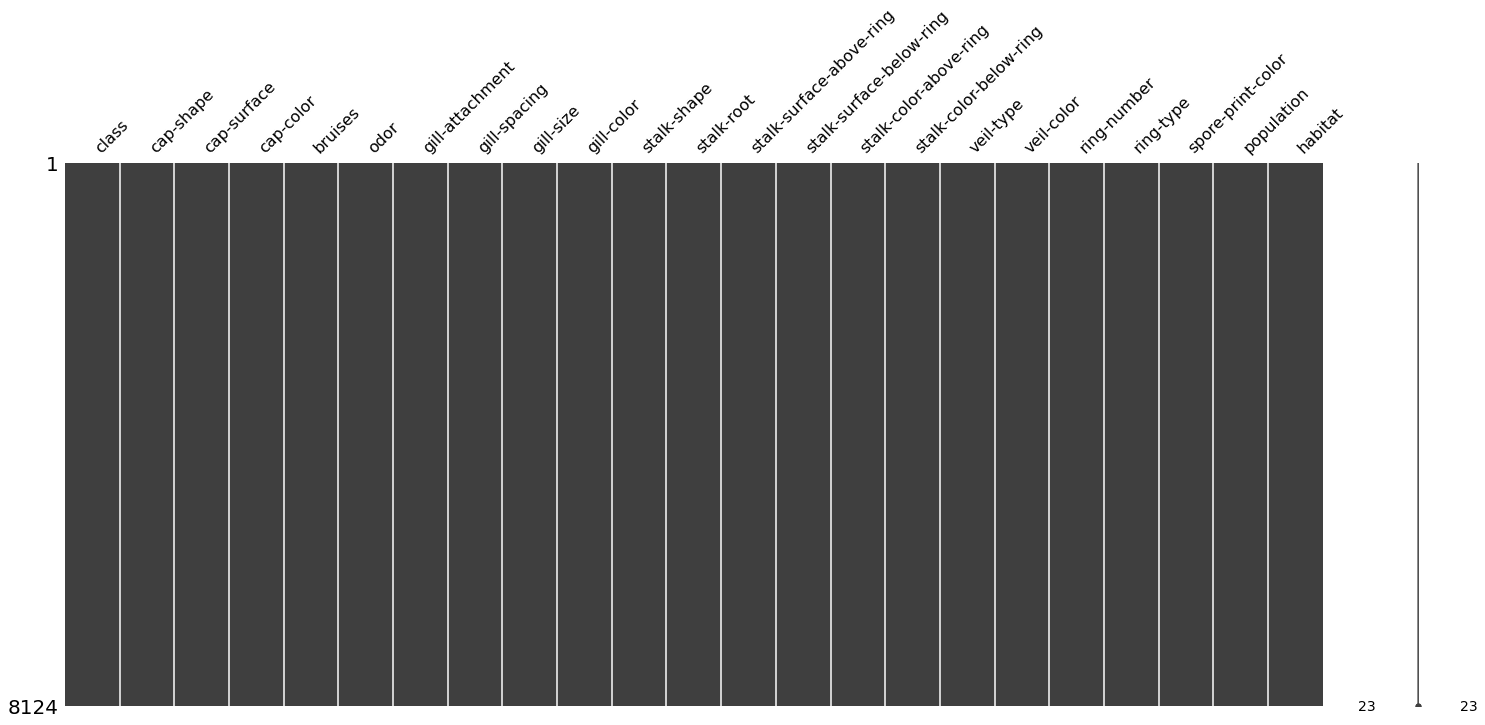

In [ ]:
msno.matrix(mushroom_df)

In [ ]:
mushroom_df.describe(include = 'object').T

,count,unique,top,freq
class,8124,2,edible,4208
cap-shape,8124,6,convex,3656
cap-surface,8124,4,scaly,3244
cap-color,8124,10,brown,2284
odor,8124,9,none,3528
gill-attachment,8124,2,free,7914
gill-spacing,8124,2,close,6812
gill-size,8124,2,broad,5612
gill-color,8124,12,buff,1728
stalk-shape,8124,2,tapering,4608


In [ ]:
mushroom_df['class'].value_counts()

edible       4208
poisonous    3916
Name: class, dtype: int64

In [ ]:
mushroom_df.groupby(['cap-shape', 'class'])['class'].count().sort_values(ascending = False)

cap-shape  class    
convex     edible       1948
           poisonous    1708
flat       edible       1596
           poisonous    1556
knobbed    poisonous     600
bell       edible        404
knobbed    edible        228
bell       poisonous      48
sunken     edible         32
conical    poisonous       4
Name: class, dtype: int64

In [ ]:
mushroom_df['same_color_cap_gill'] = [1 if x == y else 0 for (x, y) in zip(mushroom_df['cap-color'], mushroom_df['gill-color'])]

In [ ]:
mushroom_df['same_color_stalk_below_above'] = [1 if x == y else 0 for (x, y) in zip(mushroom_df['stalk-color-below-ring'], mushroom_df['stalk-color-above-ring'])]

In [ ]:
mushroom_df['same_color_stalk_below_above'].value_counts()

1    5068
0    3056
Name: same_color_stalk_below_above, dtype: int64

In [ ]:
mushroom_df.drop(['same_color_cap_gill', 'same_color_stalk_below_above'], axis = 1, inplace = True)

### 2.2 Create Dummy Variables

In [ ]:
def create_dummies(local_df, prefix):
    """
     This method takes in a list of columns, creates dummy variables, and then appends it to the dataframe
    :param prefix: This is a list of prefixes that will be attached to each of the dummy columns
    :param local_df: This is the dataframe that will be passed to the method
    :return: The appended dataframe is returned
    """
    for i in prefix:
        dummy_type = pd.get_dummies(local_df[i], prefix = i)
        local_df = pd.concat([local_df, dummy_type], axis=1)

    return local_df

In [ ]:
mushroom_df['class_int'] = mushroom_df['class'].apply(lambda x : 0 if x == 'edible' else 1)
mushroom_df['class_int'].value_counts()

0    4208
1    3916
Name: class_int, dtype: int64

In [ ]:
model1_X = mushroom_df.drop(['class', 'class_int'], axis = 1)
model1_y = mushroom_df['class_int']
model1_X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
column_names = model1_X.columns
model1_X = create_dummies(model1_X, column_names)

In [ ]:
model1_X.head()

,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
print(model1_X.shape)
model1_X.columns

(8124, 139)


Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape',
       ...
       'population_scattered', 'population_several', 'population_solitary',
       'habitat_grasses', 'habitat_leaves', 'habitat_meadows', 'habitat_paths',
       'habitat_urban', 'habitat_waste', 'habitat_woods'],
      dtype='object', length=139)

In [ ]:
# Drop original columns since we have the dummy columns now
model1_X.drop(model1_X.loc[:, 'cap-shape':'habitat'].columns, axis = 1, inplace = True)

In [ ]:
print(model1_X.shape)
model1_X.columns

(8124, 117)


Index(['cap-shape_bell', 'cap-shape_conical', 'cap-shape_convex',
       'cap-shape_flat', 'cap-shape_knobbed', 'cap-shape_sunken',
       'cap-surface_fibrous', 'cap-surface_grooves', 'cap-surface_scaly',
       'cap-surface_smooth',
       ...
       'population_scattered', 'population_several', 'population_solitary',
       'habitat_grasses', 'habitat_leaves', 'habitat_meadows', 'habitat_paths',
       'habitat_urban', 'habitat_waste', 'habitat_woods'],
      dtype='object', length=117)

## 3. Build Model

In [ ]:
def create_AUC(model, X_test, y_test, y_pred, model_title):
    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label= model_title + ' (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [ ]:
def calculate_metrics(y_test, y_pred):
    
    acc_s = accuracy_score(y_test, y_pred)
    prec_s = precision_score(y_test, y_pred)
    rec_s = recall_score(y_test, y_pred)
    
    return acc_s, prec_s, rec_s

In [ ]:
# Split the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(model1_X, model1_y, test_size = .8, random_state = 42)

### 3.1 Base Model

#### 3.1.1 Fit the Data

In [ ]:
# Build the model
rf_base = RandomForestClassifier()

In [ ]:
# Fit the model and view the best parameters
rf_base.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf_base.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### 3.1.2 Evaluate Model Performance

In [ ]:
prediction_base = rf_base.predict(X_test)
confusion_matrix(y_test, prediction_base)

array([[3362,    0],
       [   8, 3130]])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3362
           1       1.00      1.00      1.00      3138

    accuracy                           1.00      6500
   macro avg       1.00      1.00      1.00      6500
weighted avg       1.00      1.00      1.00      6500



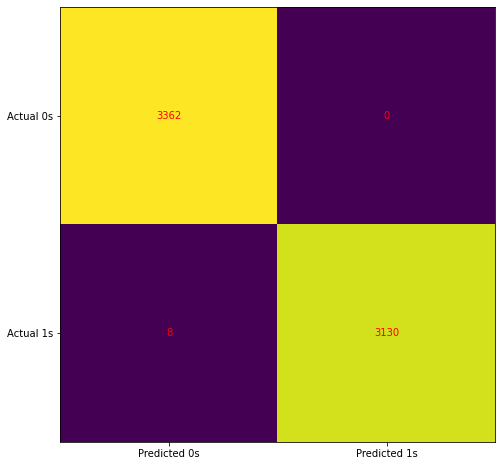

In [ ]:
# Create Classification Report to view Accuracy Scores
# Create Confusion Matrix to view True/False Positives/Negatives

print(classification_report(y_test, prediction_base))

cm = confusion_matrix(y_test, prediction_base)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

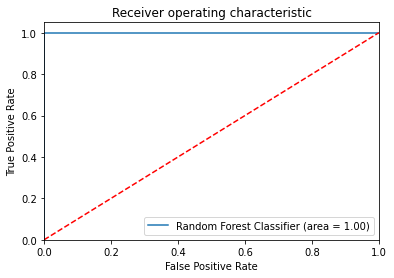

In [ ]:
create_AUC(rf_base, X_test, y_test, prediction_base, 'Random Forest Classifier')

In [ ]:
# Store the Accuracy Metrics

Base_Estimator_RF_Accuracy_Score, Base_Estimator_RF_Precision_Score, Base_Estimator_RF_Recall_Score = calculate_metrics(y_test, prediction_base)

print("Accuracy: {:.2f}".format(Base_Estimator_RF_Accuracy_Score))
print("Precision: {:.2f}".format(Base_Estimator_RF_Precision_Score))
print("Recall: {:.2f}".format(Base_Estimator_RF_Recall_Score))

Accuracy: 1.00
Precision: 1.00
Recall: 1.00


### 3.2 Tuned Model with Grid Search and CV

In [ ]:
# Setup the parameter grid
# Parameters
# 1. n_estimators (int, Default = 100):  The number of trees in the forest
# 2. max_features (sqrt, log2): The number of features to consider when looking
#    for the best split. E.g., max_features = sqrt(n_features) 
# 3. max_depth (int, Default = None): The maximum depth of the tree. If none, 
#    then nodes are expanded until all leaves are pure or leaves contain less 
#    than min_samples_split 
# 4. criterion (gini, entropy, log_loss): The function to measure the quality
#    of a split 
# 5. min_samples_split (int or float, Default = 2): The minimum number of samples
#    required to split an internal node. If int, then consider it as the minimum
#    number. If float, then it represents a fraction and ceil(min_samples_split * n_samples)
#    are the minimum number of samples for each split
# 6. min_samples_leaf (int or float, Default = 1): The minimum number of samples
#    required to be at a leaf node. A split point at any length will only be
#    considered if it leaves at least min_samples_leaf traiing samples in each
#    of the left and right branches

parameter_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [3,4,5,6,7,8],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [5]
}

#### 3.2.1 Fit the Data

In [ ]:
# Build the model
rf_CV = GridSearchCV(estimator = RandomForestClassifier(),
                     param_grid= parameter_grid,
                     cv = 5)

In [ ]:
# Fit the model and view the best parameters
rf_CV.fit(X_train, y_train)
rf_CV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'n_estimators': 200}

#### 3.2.2 Rebuild model with Optimal Parameters

In [ ]:
rf2 = RandomForestClassifier(n_estimators = 200,
                             max_depth = 8,
                             max_features = 'sqrt',
                             min_samples_leaf = 5,
                             criterion = 'gini').fit(X_train, y_train)

#### 3.2.3 Evaluate Model Performance

In [ ]:
prediction = rf2.predict(X_test)
confusion_matrix(y_test, prediction)

array([[3362,    0],
       [  15, 3123]])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3362
           1       1.00      1.00      1.00      3138

    accuracy                           1.00      6500
   macro avg       1.00      1.00      1.00      6500
weighted avg       1.00      1.00      1.00      6500



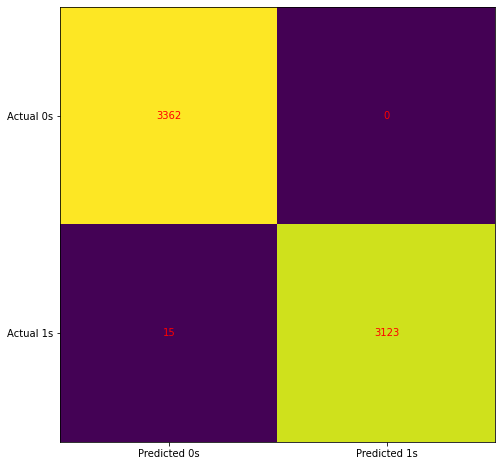

In [ ]:
# Create Classification Report to view Accuracy Scores
# Create Confusion Matrix to view True/False Positives/Negatives

print(classification_report(y_test, prediction))

cm = confusion_matrix(y_test, prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

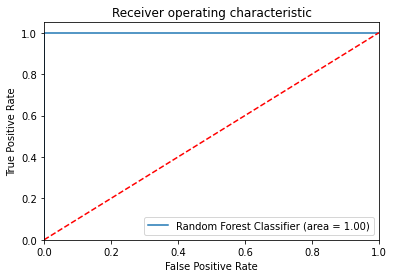

In [ ]:
create_AUC(rf2, X_test, y_test, prediction, 'Random Forest Classifier')

In [ ]:
rf_CV.best_score_

0.9975384615384616

In [ ]:
# Store the Accuracy Metrics

Tuned_Estimator_RF_Accuracy_Score, Tuned_Estimator_RF_Precision_Score, Tuned_Estimator_RF_Recall_Score = calculate_metrics(y_test, prediction)

print("Accuracy: {:.2f}".format(Tuned_Estimator_RF_Accuracy_Score))
print("Precision: {:.2f}".format(Tuned_Estimator_RF_Precision_Score))
print("Recall: {:.2f}".format(Tuned_Estimator_RF_Recall_Score))

Accuracy: 1.00
Precision: 1.00
Recall: 1.00


## 4.0 Out-of-Bag Error for Random Forest Models

In [ ]:
ensemble_clfs = [
    
  ("RandomForestClassifier, max_features = 'sqrt'",
   RandomForestClassifier(
       warm_start = True,
       oob_score = True,
       max_features = 'sqrt',
       random_state = 42
   ),),

  ("RandomForestClassifier, max_features = 'log2'",
   RandomForestClassifier(
       warm_start = True,
       oob_score = True,
       max_features = 'log2',
       random_state = 42
   ),),

  ("RandomForestClassifier, max_features = 'None'",
   RandomForestClassifier(
       warm_start = True,
       oob_score = True,
       max_features = None,
       random_state = 42
   ),)

]

In [ ]:
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

In [ ]:
min_estimators = 15
max_estimators = 500

In [ ]:
for label, clf in ensemble_clfs:
  for i in range(min_estimators, max_estimators + 1, 5):
    clf.set_params(n_estimators = i)
    clf.fit(X_train, y_train)

    oob_error = 1 - clf.oob_score_
    error_rate[label].append((i, oob_error))

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

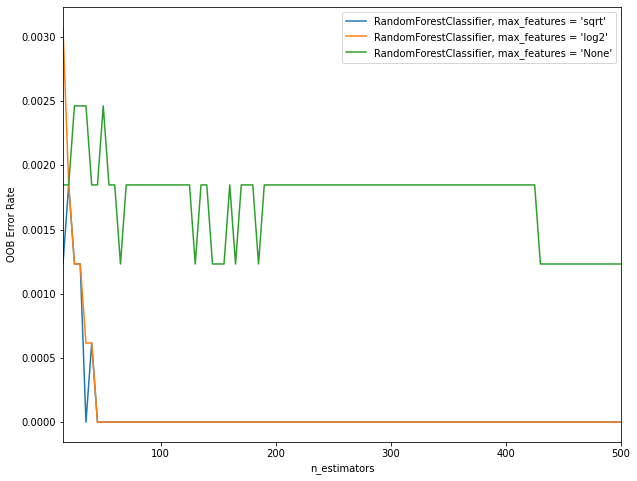

In [ ]:
# Generate OOB Error Rate and n_estimators plot
for label, clf_err in error_rate.items():
  xs, ys = zip(*clf_err)
  plt.plot(xs, ys, label = label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.legend(loc = 'upper right')
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

##5.0 Feature Importance

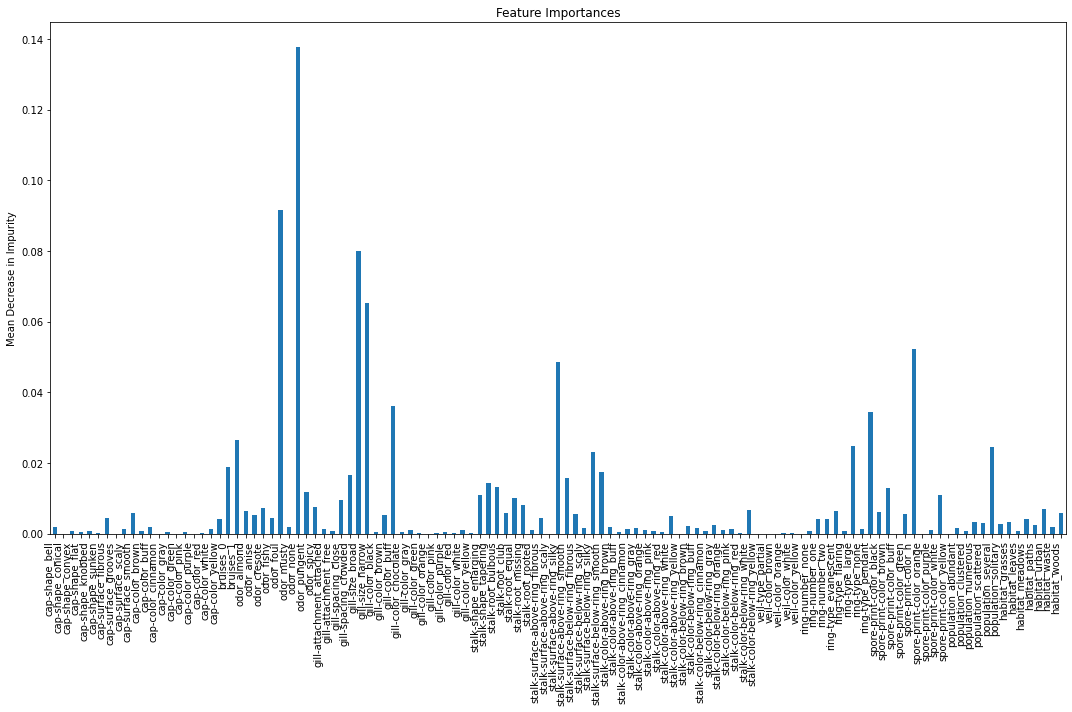

In [ ]:
importances = rf2.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf2.estimators_], axis = 0)
forest_importances = pd.Series(importances, index = X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax = ax) #yerr = std,
ax.set_title('Feature Importances')
ax.set_ylabel('Mean Decrease in Impurity')
ax.set_xticklabels(labels = X_train.columns, ha = 'right', rotation = 90)
fig.tight_layout()
plt.show()

In [ ]:
forest_importances.sort_values(ascending = False)[:10]

odor_none                         0.137776
odor_foul                         0.091573
gill-size_broad                   0.079844
gill-size_narrow                  0.065246
spore-print-color_h               0.052298
stalk-surface-above-ring_silky    0.048645
gill-color_buff                   0.036041
ring-type_pendant                 0.034294
bruises_1                         0.026406
ring-type_large                   0.024680
dtype: float64